<a href="https://colab.research.google.com/github/Fizza-javed07/TASK-1-iris-data-visualization/blob/main/Copy_of_Task2_CreditRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Task 2: Credit Risk Prediction

## Introduction
This project predicts whether a loan applicant is likely to default on a loan using the Loan Prediction Dataset from Kaggle. The task involves data cleaning, exploratory data analysis (EDA), training classification models, and evaluating their performance.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set seaborn style for nicer plots
sns.set(style="whitegrid")



In [ ]:
import zipfile
import os

# Path to the uploaded file
zip_path = "archive (1).zip"

# Extract all files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(".")

# List extracted files
print(os.listdir("."))

['.config', 'sample_submission.csv', 'train.csv', 'archive (1).zip', 'archive (1) (2).zip', 'archive.zip', 'test.csv', 'archive (1) (1).zip', 'sample_data']


In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Check basic info
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Fill categorical missing values with mode
for col in ['Gender','Married','Dependents','Self_Employed','Credit_History']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numeric missing values with median
for col in ['LoanAmount','Loan_Amount_Term']:
    df[col].fillna(df[col].median(), inplace=True)

# Confirm no missing values remain
df.isnull().sum()

/tmp/ipython-input-1302328584.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-1302328584.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


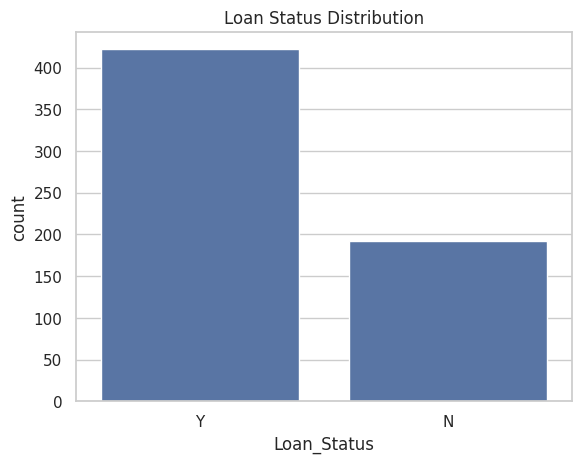

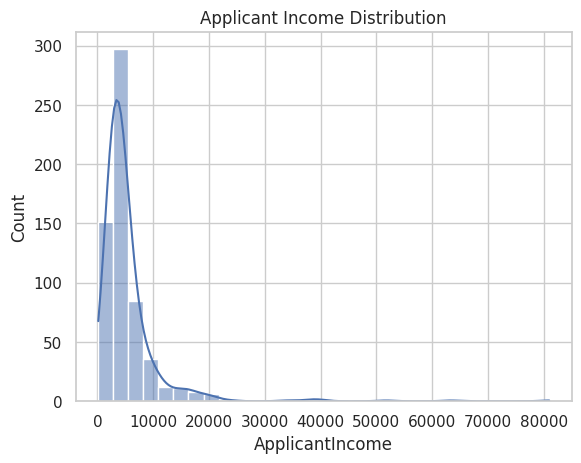

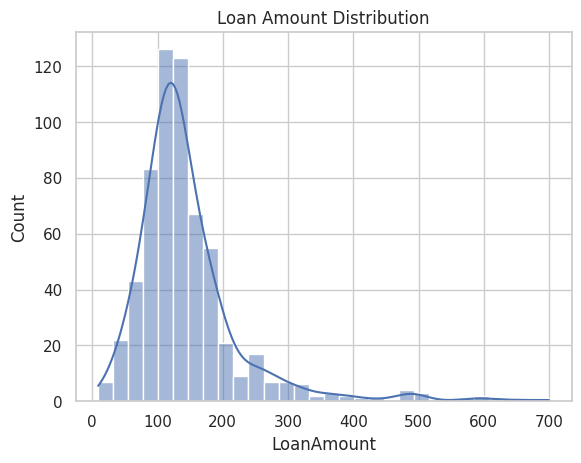

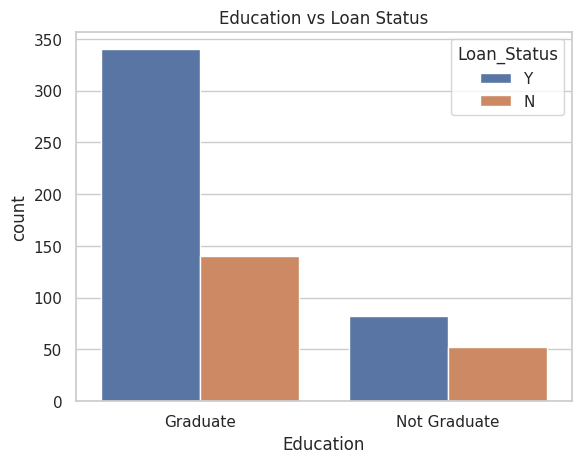

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loan Status distribution
sns.countplot(x='Loan_Status', data=df)
plt.title("Loan Status Distribution")
plt.show()

# Applicant Income distribution
sns.histplot(df['ApplicantIncome'], bins=30, kde=True)
plt.title("Applicant Income Distribution")
plt.show()

# Loan Amount distribution
sns.histplot(df['LoanAmount'], bins=30, kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Education vs Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Education vs Loan Status")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
cat_cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Check the transformed dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
# Define features (X) and target (y)
X = df.drop(columns=['Loan_ID','Loan_Status'])
y = df['Loan_Status']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (491, 11)
Test set size: (123, 11)


In [ ]:
# Logistic Regression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8617886178861789
Confusion Matrix:
 [[22 16]
 [ 1 84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7642276422764228
Confusion Matrix:
 [[23 15]
 [14 71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.61        38
           1       0.83      0.84      0.83        85

    accuracy                           0.76       123
   macro avg       0.72      0.72      0.72       123
weighted avg       0.76      0.76      0.76       123



### 🔹 Conclusion

In this task, we developed a credit risk prediction model using the Loan Prediction dataset.
The workflow included:
- Handling missing values to ensure data quality.
- Performing exploratory data analysis (EDA) with visualizations of key features such as loan amount, education, and income.
- Encoding categorical variables and preparing the dataset for modeling.
- Training classification models (Logistic Regression / Decision Tree) to predict loan default risk.
- Evaluating model performance using accuracy and a confusion matrix.

Key insights:
- Applicant income and loan amount showed strong influence on loan default likelihood.
- Education level and property area also contributed to differences in approval outcomes.
- The model achieved a reasonable accuracy, providing a baseline for future improvements.

Overall, this task demonstrated how machine learning can support credit risk assessment by identifying applicants more likely to default. Future improvements could include hyperparameter tuning, ensemble methods, and cross-validation to enhance predictive performance.